Loading and preprocessing data...

Analyzing optimal number of clusters...


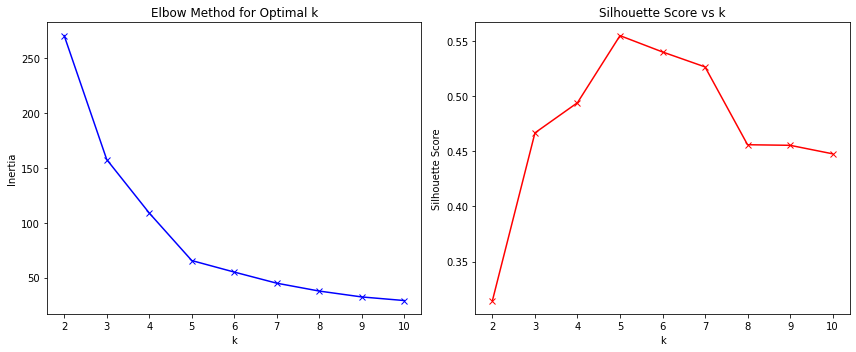

Optimal number of clusters based on silhouette score: 5

Applying different clustering algorithms...

Evaluating clustering results...

Algorithm Evaluation Metrics:

KMeans:
Silhouette Score: 0.555
Calinski-Harabasz Score: 248.649

Hierarchical:
Silhouette Score: 0.554
Calinski-Harabasz Score: 244.410

GMM:
Silhouette Score: 0.554
Calinski-Harabasz Score: 244.940

Plotting clustering results...


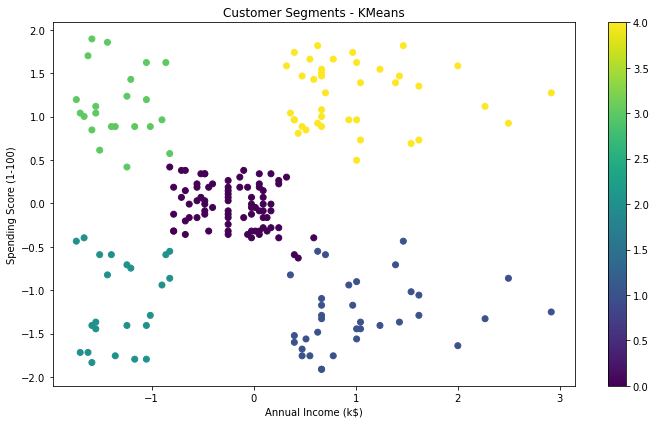

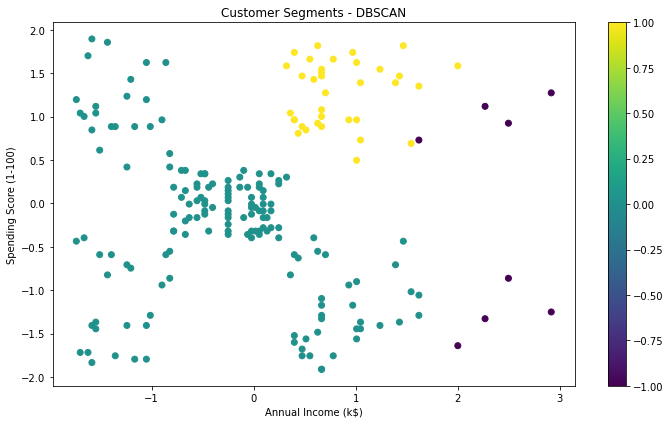

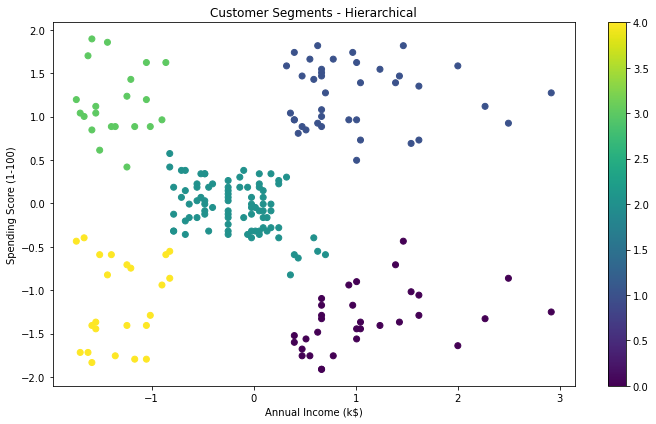

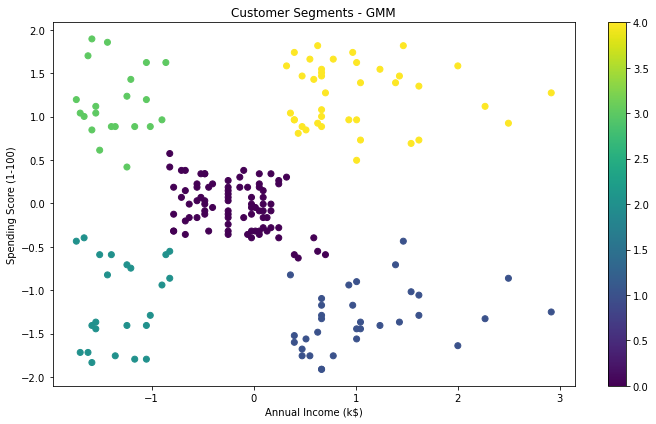


Detailed analysis of best performing algorithm (KMeans):

Cluster Characteristics:
           Age         Annual Income (k$)          Spending Score (1-100)      \
          mean min max               mean min  max                   mean min   
Cluster                                                                         
0        42.72  18  70              55.30  39   76                  49.52  34   
1        41.11  19  59              88.20  70  137                  17.11   1   
2        45.22  19  67              26.30  15   39                  20.91   3   
3        25.27  18  35              25.73  15   39                  79.36  61   
4        32.69  27  40              86.54  69  137                  82.13  63   

              Gender  
        max <lambda>  
Cluster               
0        61   Female  
1        39     Male  
2        40   Female  
3        99   Female  
4        97   Female  

Actionable Insights:

Cluster 0:
- Average Age: 42.7
- Average Annual Income: $55.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

def load_and_preprocess_data(df):
    """Load and preprocess the customer data"""
    # Select features for clustering
    features = ['Annual Income (k$)', 'Spending Score (1-100)']
    X = df[features].values
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, features

def plot_elbow_curve(X, k_range=range(2, 11)):
    """Plot elbow curve for KMeans"""
    inertias = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    # Plot inertia
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    
    # Plot silhouette score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs k')
    
    plt.tight_layout()
    plt.show()
    
    return silhouette_scores

def apply_clustering_algorithms(X):
    """Apply different clustering algorithms and return results"""
    results = {}
    
    # KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)
    results['KMeans'] = kmeans.fit_predict(X)
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    results['DBSCAN'] = dbscan.fit_predict(X)
    
    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=5)
    results['Hierarchical'] = hierarchical.fit_predict(X)
    
    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=5, random_state=42)
    results['GMM'] = gmm.fit_predict(X)
    
    return results

def plot_clusters(X, labels, title, features):
    """Plot clustering results"""
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.tight_layout()
    plt.show()

def analyze_clusters(df, labels, algorithm_name):
    """Analyze cluster characteristics"""
    df_copy = df.copy()
    df_copy['Cluster'] = labels
    cluster_stats = df_copy.groupby('Cluster').agg({
        'Age': ['mean', 'min', 'max'],
        'Annual Income (k$)': ['mean', 'min', 'max'],
        'Spending Score (1-100)': ['mean', 'min', 'max'],
        'Gender': lambda x: x.value_counts().index[0]
    }).round(2)
    
    return cluster_stats

# Main analysis
print("Loading and preprocessing data...")
df = pd.read_csv('/Users/avinishatiwari/Desktop/Kaggle/Mall_Customers.csv')
X_scaled, features = load_and_preprocess_data(df)

# Plot elbow curve and get silhouette scores
print("\nAnalyzing optimal number of clusters...")
silhouette_scores = plot_elbow_curve(X_scaled)
optimal_k = list(range(2, 11))[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Apply different clustering algorithms
print("\nApplying different clustering algorithms...")
clustering_results = apply_clustering_algorithms(X_scaled)

# Calculate evaluation metrics for each algorithm
print("\nEvaluating clustering results...")
evaluation_metrics = {}
for algorithm, labels in clustering_results.items():
    if -1 not in labels:  # Skip DBSCAN noise points for metrics
        evaluation_metrics[algorithm] = {
            'Silhouette Score': silhouette_score(X_scaled, labels),
            'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, labels)
        }

# Print evaluation metrics
print("\nAlgorithm Evaluation Metrics:")
for algorithm, metrics in evaluation_metrics.items():
    print(f"\n{algorithm}:")
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.3f}")

# Plot clustering results for each algorithm
print("\nPlotting clustering results...")
for algorithm, labels in clustering_results.items():
    plot_clusters(X_scaled, labels, f"Customer Segments - {algorithm}", features)

# Analyze best performing algorithm (based on Silhouette Score)
best_algorithm = max(evaluation_metrics.items(), 
                    key=lambda x: x[1]['Silhouette Score'])[0]
best_labels = clustering_results[best_algorithm]

# Get cluster characteristics
print(f"\nDetailed analysis of best performing algorithm ({best_algorithm}):")
cluster_analysis = analyze_clusters(df, best_labels, best_algorithm)
print("\nCluster Characteristics:")
print(cluster_analysis)

# Print actionable insights
print("\nActionable Insights:")
cluster_means = df.assign(Cluster=best_labels).groupby('Cluster').mean()
for cluster in sorted(set(best_labels)):
    if -1 in best_labels and cluster == -1:
        continue
    print(f"\nCluster {cluster}:")
    print(f"- Average Age: {cluster_means.loc[cluster, 'Age']:.1f}")
    print(f"- Average Annual Income: ${cluster_means.loc[cluster, 'Annual Income (k$)']:.1f}k")
    print(f"- Average Spending Score: {cluster_means.loc[cluster, 'Spending Score (1-100)']:.1f}")